In [4]:
import requests
import pandas as pd
import io
import numpy as np
#!pip install imgaug==0.2.6
#!pip uninstall matplotlib
#!pip install matplotlib==3.5
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import lines
import matplotlib
if matplotlib.__version__ != '3.5.0':
  !pip install imgaug==0.2.6
  !pip install matplotlib==3.5.0
else:
  pass
import waterfall_chart
import ast
#!pip install waterfallcharts

## Bar Chart

In [4]:
response = requests.get('https://opendata.ecdc.europa.eu/covid19/nationalcasedeath_eueea_daily_ei/csv/data.csv').content

In [5]:
covid_case_death = pd.read_csv(io.StringIO(response.decode('utf-8')))
covid_case_death.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp
0,18/04/2022,18,4,2022,5411.0,3.0,Austria,AT,AUT,8901064,Europe
1,17/04/2022,17,4,2022,5774.0,10.0,Austria,AT,AUT,8901064,Europe
2,16/04/2022,16,4,2022,7811.0,8.0,Austria,AT,AUT,8901064,Europe
3,15/04/2022,15,4,2022,9202.0,10.0,Austria,AT,AUT,8901064,Europe
4,14/04/2022,14,4,2022,10345.0,13.0,Austria,AT,AUT,8901064,Europe


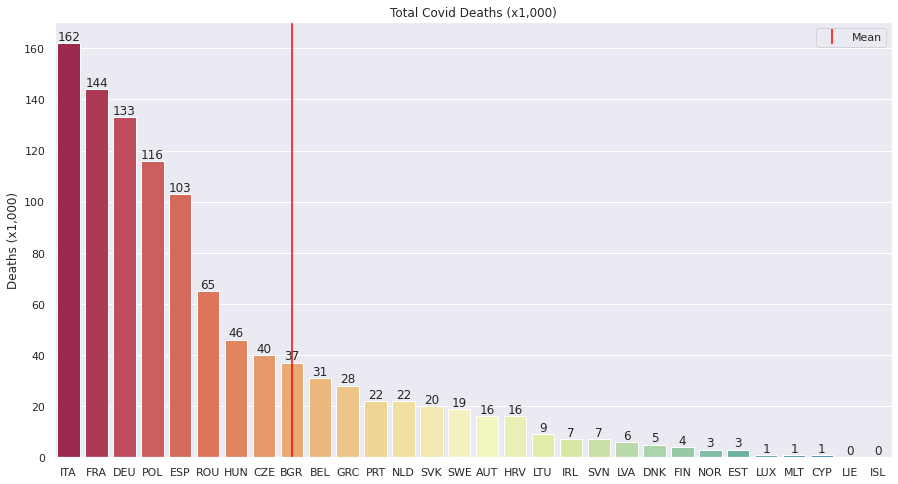

In [8]:
total_cases_per_country = (covid_case_death.groupby('countryterritoryCode').sum()['deaths']/1000).round().sort_values(ascending=False)

ax = sns.barplot(x=total_cases_per_country.index,y=total_cases_per_country,palette ="Spectral")#RdYlGn_r  vlag
sns.set(rc={'figure.figsize':(15,8)})


ax.set(title='Total Covid Deaths (x1,000)', xlabel=None,ylabel='Deaths (x1,000)')

plt.axvline(x=np.argmin((total_cases_per_country-35).abs().tolist()),
            color='red')

vertical_line = lines.Line2D([], [], color='red', marker='|', linestyle='None',
                          markersize=15, markeredgewidth=1.5, label='Mean')

plt.legend(handles = [vertical_line])


for i in ax.containers:
    ax.bar_label(i,)

## Waterfall Chart

In [5]:

response = requests.get('https://analisi.transparenciacatalunya.cat/resource/x5sz-niat.json').content

population = pd.DataFrame(ast.literal_eval(response.decode('utf-8')))
population.sort_values('nom_ens',ascending=False).tail()

,codi_10,nom_ens,any,total,homes,dones
70,0800180001,Ajuntament d'Abrera,1993,6041,NaN,NaN
71,0800180001,Ajuntament d'Abrera,1992,5726,NaN,NaN
72,0800180001,Ajuntament d'Abrera,1991,5464,NaN,NaN
73,0800180001,Ajuntament d'Abrera,1990,5238,NaN,NaN
65,0800180001,Ajuntament d'Abrera,1999,7728,NaN,NaN


Text(0.5, 1.0, 'Barcelona Population Growth 2010 to 2019')

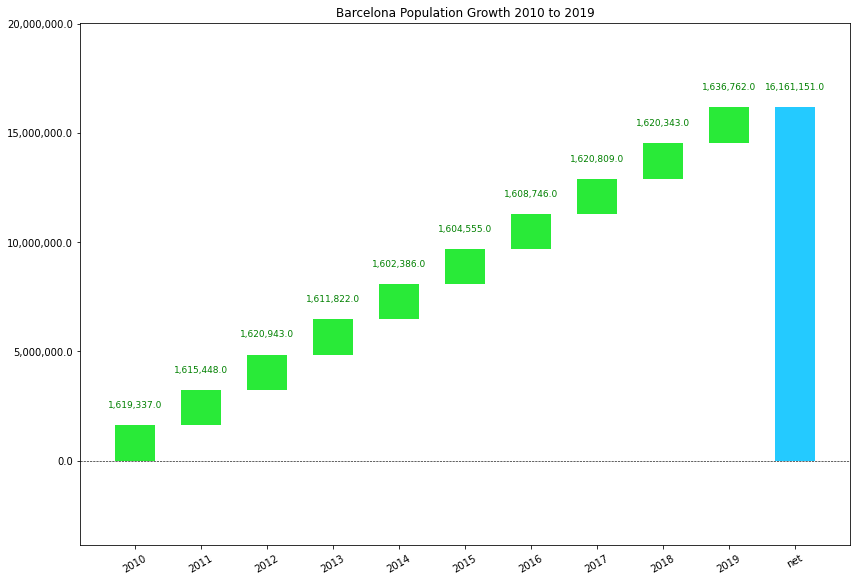

In [67]:
#!pip install waterfallcharts

pop_bcn = population[population.nom_ens=='Ajuntament de Barcelona'].sort_values('any',ascending=True).tail(10)

pop_bcn['any'] = pop_bcn['any']
pop_bcn['total'] = pop_bcn['total'].astype('int32')

waterfall_chart.plot(pop_bcn['any'], pop_bcn['total'])
plt.rcParams["figure.figsize"] = (12,8)
plt.title('Barcelona Population Growth 2010 to 2019')


## Isotype & Unit charts